<a href="https://colab.research.google.com/github/ramansandhu17/Social-Media-Engagement-Optimization-/blob/main/eda_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df=pd.read_excel('socialmedia.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Platform            100000 non-null  object        
 1   Post ID             100000 non-null  object        
 2   Post Type           100000 non-null  object        
 3   Post Content        100000 non-null  object        
 4   Post Timestamp      100000 non-null  datetime64[ns]
 5   Likes               100000 non-null  int64         
 6   Comments            100000 non-null  int64         
 7   Shares              100000 non-null  int64         
 8   Impressions         100000 non-null  int64         
 9   Reach               100000 non-null  int64         
 10  Engagement Rate     100000 non-null  float64       
 11  Audience Age        100000 non-null  int64         
 12  Audience Gender     100000 non-null  object        
 13  Audience Location   100000 non

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#preview data
df.head()


,Platform,Post ID,Post Type,Post Content,Post Timestamp,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age,Audience Gender,Audience Location,Audience Interests,Campaign ID,Sentiment,Influencer ID
0,LinkedIn,d49dadb4-fc1e-4775-88ad-d60b75cf5123,Video,Want that according same wish.,2021-04-23 08:19:49.255,415,77,85,2619,1842,31.32,29,Other,United Kingdom,respond,NaN,Negative,NaN
1,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 06:40:06.356,908,125,85,1223,3884,28.78,48,Male,Greece,population,NaN,Neutral,NaN
2,Instagram,6a6cc741-72f4-4111-95a0-c5ee04a175a8,Video,Lawyer behavior born window couple sister.,2021-12-05 03:56:53.212,412,419,58,2165,849,104.71,55,Male,United States Virgin Islands,himself,NaN,Neutral,NaN
3,Twitter,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,Image,Street great decade must.,2021-09-28 20:39:00.228,667,153,29,7191,3519,24.13,54,Other,Zambia,safe,NaN,NaN,NaN
4,Facebook,a7d3e958-e2fe-411e-a24a-b96e821fc050,Link,At clear meeting with reason ground continue c...,2023-02-27 17:51:21.425,659,215,34,3312,2032,44.69,33,Other,Afghanistan,well,6052b8d2-3403-4447-b0b4-c5ce20e6c8d0,NaN,NaN


In [5]:
print(df.shape)

(100000, 18)


In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
Influencer ID,90006
Campaign ID,79868
Sentiment,50100
Platform,0
Post ID,0
Post Type,0
Comments,0
Post Content,0
Post Timestamp,0
Likes,0


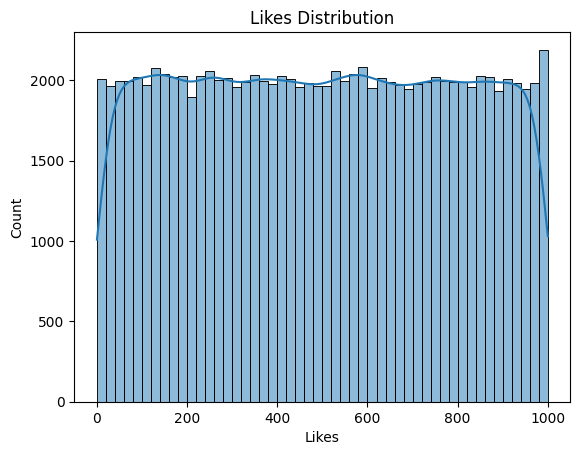

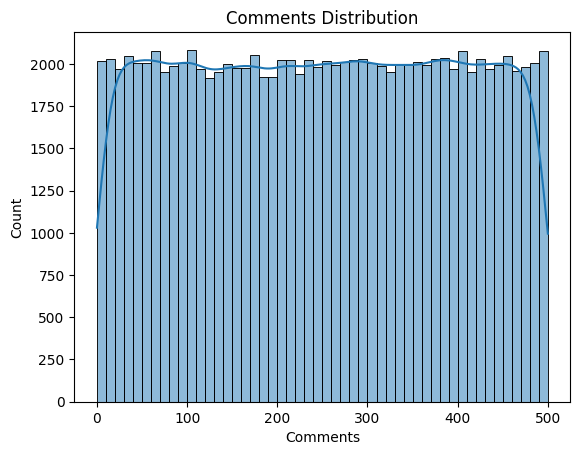

In [10]:
#Engagement Distribution

sns.histplot(df['Likes'],bins=50,kde=True)
plt.xlabel('Likes')
plt.title('Likes Distribution')

plt.show()

#Comments distribution
sns.histplot(df['Comments'],bins=50,kde=True)
plt.xlabel('Comments')
plt.title('Comments Distribution')

plt.show()

#Engagement Distribution


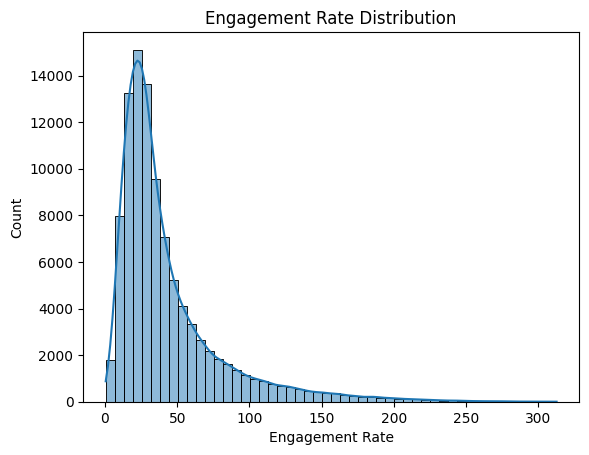

In [11]:
sns.histplot(df['Engagement Rate'],bins=50,kde=True)
plt.xlabel('Engagement Rate')
plt.title('Engagement Rate Distribution')

plt.show()

In [17]:
#Feature Engineering

#1. Post Length

df['post_length']=df['Post Content'].astype(str).str.len()

#2. Check if hashtags are available in content then label as 1

df['has_hashtags']=df['Post Content'].astype(str).str.contains('#').astype(int)


#3. Does the post content have links such as http or 'www'
df['has_links']=df['Post Content'].astype(str).str.contains('http|www').astype(int)

#4. Date features

df['post_hour']=df['Post Timestamp'].dt.hour
df['post_dayofweek']=df['Post Timestamp'].dt.day_name()
df['post_month']=df['Post Timestamp'].dt.month
df['is_weekend']=df['post_dayofweek'].isin(['Saturday','Sunday']).astype(int)

#preview
df[['post_length', 'has_hashtags', 'has_links', 'post_hour', 'post_dayofweek', 'is_weekend']].head()

# Create total engagement and engaged label
df['total_engagement'] = df['Likes'] + df['Comments'] + df['Shares']
threshold = df['total_engagement'].median()
df['engaged'] = (df['total_engagement'] >= threshold).astype(int)

# Save updated dataset



In [19]:
df.to_csv('socialmedia_cleaned.csv')

df.head()

,Platform,Post ID,Post Type,Post Content,Post Timestamp,Likes,Comments,Shares,Impressions,Reach,...,post_length,has_hashtag,has_links,post_hour,post_dayofweek,post_month,is_weekend,has_hashtags,total_engagement,engaged
0,LinkedIn,d49dadb4-fc1e-4775-88ad-d60b75cf5123,Video,Want that according same wish.,2021-04-23 08:19:49.255,415,77,85,2619,1842,...,30,0,0,8,Friday,4,0,0,577,0
1,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 06:40:06.356,908,125,85,1223,3884,...,28,0,0,6,Sunday,7,1,0,1118,1
2,Instagram,6a6cc741-72f4-4111-95a0-c5ee04a175a8,Video,Lawyer behavior born window couple sister.,2021-12-05 03:56:53.212,412,419,58,2165,849,...,42,0,0,3,Sunday,12,1,0,889,1
3,Twitter,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,Image,Street great decade must.,2021-09-28 20:39:00.228,667,153,29,7191,3519,...,25,0,0,20,Tuesday,9,0,0,849,0
4,Facebook,a7d3e958-e2fe-411e-a24a-b96e821fc050,Link,At clear meeting with reason ground continue c...,2023-02-27 17:51:21.425,659,215,34,3312,2032,...,53,0,0,17,Monday,2,0,0,908,1
